# **Tren Skor PISA di ASEAN: Posisi Indonesia dalam Pendidikan Global (2006-2022)**



## **1. Pendahuluan**

Pendidikan memiliki peran yang sangat krusial dalam membentuk masa depan suatu bangsa. Untuk mengukur kualitas pendidikan di berbagai negara, Programme for International Student Assessment (PISA) menjadi salah satu standar global yang digunakan. PISA merupakan studi internasional yang diselenggarakan oleh Organisation for Economic Co-operation and Development (OECD) setiap tiga tahun sekali. Studi ini mengevaluasi kemampuan siswa berusia 15 tahun dalam tiga domain utama: membaca, matematika, dan sains.

Indonesia, sebagai salah satu negara peserta PISA sejak tahun 2000, telah mengalami berbagai dinamika dalam hasil penilaiannya. Tren skor PISA dapat mencerminkan efektivitas kebijakan pendidikan, tingkat kesiapan siswa, serta tantangan yang dihadapi dalam sektor pendidikan. Selain itu, membandingkan skor PISA Indonesia dengan negara-negara ASEAN lainnya dapat memberikan wawasan lebih luas mengenai posisi Indonesia dalam konteks regional dan membantu mengidentifikasi area yang perlu diperbaiki.

Laporan ini bertujuan untuk menganalisis tren skor PISA di ASEAN dengan fokus utama pada Indonesia dari tahun 2006 hingga 2022. Dengan menggunakan analisis data berbasis Python, laporan ini akan mengeksplorasi perubahan skor PISA dari waktu ke waktu, membandingkan pencapaian antarnegara, serta mengidentifikasi faktor-faktor yang dapat mempengaruhi hasil penilaian. Data yang digunakan dalam laporan ini bersumber dari OECD PISA Database, yang mencakup skor membaca, matematika, dan sains dari berbagai negara di ASEAN. Melalui visualisasi data dan analisis statistik, laporan ini diharapkan dapat memberikan wawasan mendalam mengenai tren pendidikan di ASEAN serta rekomendasi untuk peningkatan kualitas pendidikan di Indonesia.

## **2. Sumber Data**

Dataset yang digunakan dalam laporan ini berasal dari 2 dataset berbeda dan mencakup skor PISA dari berbagai negara di dunia, termasuk negara-negara ASEAN. Dataset ini mencatat skor rata-rata untuk tiga bidang utama yang diuji dalam PISA: Matematika (Math), Membaca (Reading), dan Sains (Science).

Untuk memperoleh gambaran tren jangka panjang, laporan ini menggunakan dua dataset yang mencakup periode 2006 hingga 2022.
1. Dataset PISA 2006-2018  
    - Sumber: OECD PISA Database
    - Format: 
        - Country: Nama negara yang berpartisipasi dalam PISA.
        - Subject: Subjek yang diuji dalam PISA (Math, Reading, Science).
        - Score: Skor rata-rata yang diperoleh siswa di negara tersebut untuk subjek tertentu.
        - Year: Tahun pelaksanaan PISA (dalam analisis ini, rentang 2006–2018).

2. Dataset PISA 2022  
    - Sumber: Laporan resmi PISA 2022 dari OECD
    - Format: 
        - country: Nama negara peserta PISA
        - PISAScoresMathScore2022: Skor Matematika
        - PISAScoresScienceScore2022: Skor Sains
        - PISAScoresReadingScore2022: Skor Membaca



## **3. Persiapan Data (Data Preprocessing & Cleaning)**

### Mengimport library yang digunakan

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

### Membaca data CSV

In [14]:
data_old = pd.read_csv('data/pisa_2006-2018.csv')
data_new = pd.read_csv('data/pisa-scores-by-country-2024.csv', usecols=lambda column: "PISAScoresOverallScore2018" not in column and "OverallPisaScore2022" not in column)

print("Data Pisa 2006-2018")
print(data_old.head())
print("\nData Pisa 2022")
print(data_new.head())

Data Pisa 2006-2018
   Year Subject    Country  Score  Rank
0  2006   Maths    Albania    NaN   NaN
1  2006   Maths    Algeria    NaN   NaN
2  2006   Maths  Argentina    NaN   NaN
3  2006   Maths  Australia  520.0  12.0
4  2006   Maths    Austria  505.0  17.0

Data Pisa 2022
         country  PISAScoresMathScore2022  PISAScoresScienceScore2022  \
0          China                    552.0                       543.0   
1  United States                    465.0                       499.0   
2      Indonesia                    366.0                       383.0   
3         Brazil                    379.0                       403.0   
4         Mexico                    395.0                       410.0   

   PISAScoresReadingScore2022  
0                       510.0  
1                       504.0  
2                       359.0  
3                       410.0  
4                       415.0  


### Transformasi data PISA 2022

In [15]:
data_melt = data_new.melt(id_vars=['country'], var_name='Subject', value_name='Score')
data_melt.rename(columns={'country': 'Country'}, inplace=True)
data_melt["Subject"] = data_melt["Subject"].str.replace("PISAScores", "").str.replace("Score2022", "").str.replace("Pisa", "")
data_melt['Year'] = 2022

print(data_melt)

           Country  Subject     Score  Year
0            China     Math  552.0000  2022
1    United States     Math  465.0000  2022
2        Indonesia     Math  366.0000  2022
3           Brazil     Math  379.0000  2022
4           Mexico     Math  395.0000  2022
..             ...      ...       ...   ...
238     Montenegro  Reading  405.0000  2022
239          Malta  Reading  445.0000  2022
240         Brunei  Reading  429.0000  2022
241        Iceland  Reading  436.0000  2022
242          Total  Reading  436.1875  2022

[243 rows x 4 columns]


### Menggabungkan data 2006-2018 dengan data 2022

In [16]:
data = pd.concat([data_old, data_melt], ignore_index=True)
data["Subject"] = data["Subject"].replace("Maths","Math")
print(data.head(10))

   Year Subject         Country  Score  Rank
0  2006    Math         Albania    NaN   NaN
1  2006    Math         Algeria    NaN   NaN
2  2006    Math       Argentina    NaN   NaN
3  2006    Math       Australia  520.0  12.0
4  2006    Math         Austria  505.0  17.0
5  2006    Math   China B-S-J-G    NaN   NaN
6  2006    Math         Belgium  520.0  11.0
7  2006    Math          Brazil  370.0  50.0
8  2006    Math        Bulgaria  413.0  43.0
9  2006    Math  Argentina CABA    NaN   NaN


### Menampilkan data unik tiap kolom

In [17]:
print("\n",data["Country"].unique())
print("\n",data["Subject"].unique())
print("\n",data["Year"].unique())


 ['Albania' 'Algeria' 'Argentina' 'Australia' 'Austria' 'China B-S-J-G'
 'Belgium' 'Brazil' 'Bulgaria' 'Argentina CABA' 'Canada' 'Chile' 'Taiwan'
 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'Estonia' 'Finland' 'France' 'Macedonia' 'Georgia'
 'Germany' 'Greece' 'Hong Kong' 'Hungary' 'Iceland' 'Indonesia' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Jordan' 'Kazakhstan' 'South Korea' 'Kosovo'
 'Latvia' 'Lebanon' 'Lithuania' 'Luxembourg' 'Macau' 'Malaysia' 'Malta'
 'Mexico' 'Moldova' 'Montenegro' 'Netherlands' 'New Zealand' 'Norway'
 'Peru' 'Poland' 'Portugal' 'Qatar' 'Romania' 'Russia' 'Singapore'
 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland' 'Thailand'
 'Trinidad and Tobago' 'Tunisia' 'Turkey' 'United Arab Emirates'
 'United Kingdom' 'United States' 'Uruguay' 'Vietnam' 'China (B-S-J-Z)'
 'Macau(China)' 'Hong Kong (China)' 'Belarus' 'Ukraine' 'Serbia' 'Brunei'
 'Azerbaijan' 'Bosnia and Herzegovina' 'North Macedonia' 'Saudi Arabia'
 'Moroc

### Pembersihan data (data cleaning)

In [18]:
data["Country"] = data["Country"].replace("China (B-S-J-Z)", "China")
data["Country"] = data["Country"].replace("China (B-S-J-G)", "China")
data["Country"] = data["Country"].replace("Hong Kong (China)", "Hong kong")
data["Country"] = data["Country"].replace("Macau (China)", "Macau")
data = data[data["Country"] != "Argentina ACAB"]
data.drop(columns="Rank", inplace=True)

data.dropna(inplace=True)


### Mengelompokan data negara ASEAN

In [19]:
asean = ["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", "Myanmar", "Philippines", "Singapore", "Thailand", "Vietnam"]
data_asean = data[data["Country"].isin(asean)]
print(data_asean)

print(data_asean[(data_asean["Country"] == "Indonesia") & (data_asean["Year"] == 2015)])


      Year  Subject    Country  Score
30    2006     Math  Indonesia  391.0
64    2006     Math   Thailand  417.0
103   2009     Math  Indonesia  371.0
131   2009     Math  Singapore  562.0
137   2009     Math   Thailand  419.0
...    ...      ...        ...    ...
1284  2022  Reading   Thailand  379.0
1297  2022  Reading   Malaysia  388.0
1307  2022  Reading   Cambodia  329.0
1327  2022  Reading  Singapore  543.0
1352  2022  Reading     Brunei  429.0

[90 rows x 4 columns]
     Year  Subject    Country  Score
249  2015     Math  Indonesia  386.0
541  2015  Science  Indonesia  403.0
833  2015  Reading  Indonesia  397.0


# **4. Visualisasi dan Analisis**

### **4.1 Tren Skor PISA Indonesia dari 2006 hingga 2022**

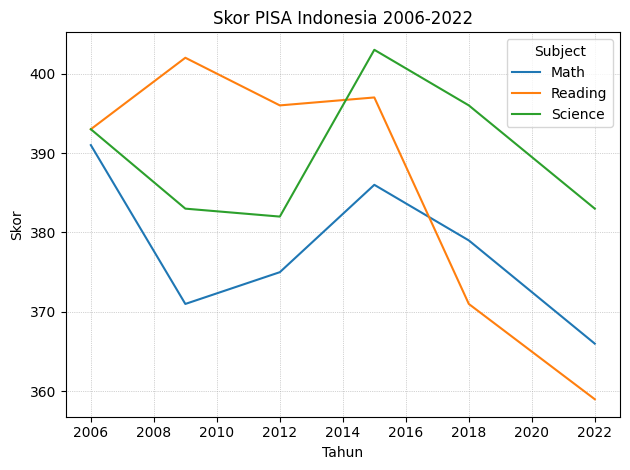

In [20]:
data_asean[data_asean["Country"]=="Indonesia"].groupby(["Year", "Subject"])["Score"].sum().unstack().plot(kind="line")
plt.title("Skor PISA Indonesia 2006-2022")
plt.ylabel("Skor")
plt.xlabel("Tahun")
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.savefig("gambar/skor_pisa_indonesia_2006-2022.png")

Dari grafik dapat dilihat terdapat tren naik pada pada tahun 2009 hingga puncaknya pada ditahun 2015. Ditahun 2018 terjadi tren penurunan hingga puncaknya di tahun 2022 yang juga skor terburuk negara indonesia sepanjang periode 2006 hingga 2022.

### **4.2 Perbandingan Skor Indonesia dengan Negara ASEAN**

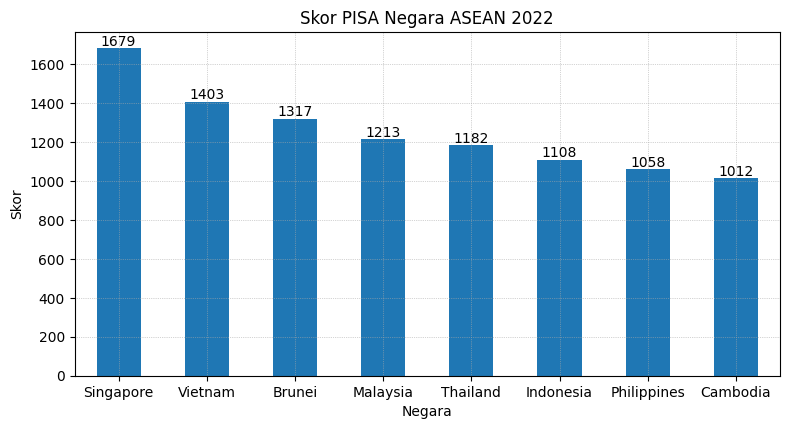

In [21]:
data_asean[data_asean["Year"]==2022].groupby("Country")["Score"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(8, 5))  
plt.title("Skor PISA Negara ASEAN 2022")
plt.ylabel("Skor")
plt.xlabel("Negara")
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.xticks(rotation=0)
plt.bar_label(container=plt.gca().containers[0])
plt.savefig("gambar/skor_pisa_negara_asean_2022.png")


Dari 8 negara ASEAN yang mengikuti PISA, Indonesia berada di urutan ke 6 dengan jumlah skor 1182

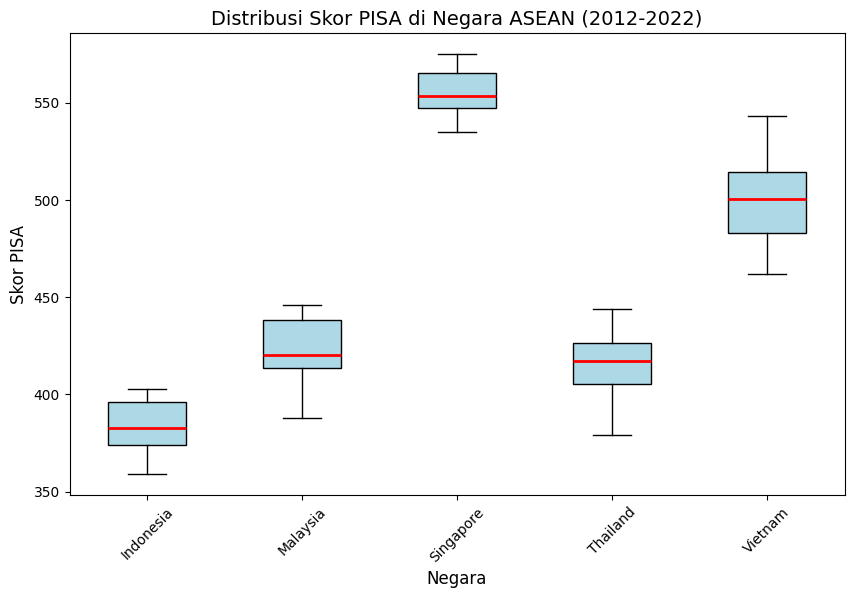

In [22]:
data_subset = data_asean[data_asean["Year"] >= 2012]
country_years = data_subset.groupby("Country")["Year"].nunique()

valid_countries = country_years[country_years == 4].index 

data_subset = data_subset[data_subset["Country"].isin(valid_countries)]

grouped_data = [data_subset[data_subset["Country"] == country]["Score"].tolist() for country in valid_countries]

plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data, tick_labels= valid_countries, patch_artist=True, 
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="red", linewidth=2), whiskerprops=dict(color="black"))

plt.xlabel("Negara", fontsize=12)
plt.ylabel("Skor PISA", fontsize=12)
plt.title("Distribusi Skor PISA di Negara ASEAN (2012-2022)", fontsize=14)
plt.xticks(rotation=45)
plt.savefig("gambar/distribusi_skor_pisa_negara_asean_2012-2022.png")

Dari box plot ini, Singapura dan Vietnam mendominasi dalam performa PISA di ASEAN, sementara Indonesia memiliki skor yang lebih rendah tetapi cukup stabil. Malaysia dan Thailand memiliki variasi skor yang lebih besar, yang memperlihatkan ketimpangan dalam performa siswa di negara tersebut. 